IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

IMPORTING THE DATASET

In [2]:
df = pd.read_csv(r"F:\Project\Project 1\39110788-Pranash  R(PT1_Project)\Dataset\SeoulBikeData.csv", encoding='iso-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

ANALYSE THE DATA

In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [7]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
df.drop(columns =['Date'],axis = 1, inplace = True)

In [9]:
df['Hour']=df['Hour'].astype('object')

In [10]:
df['Hour']

0        0
1        1
2        2
3        3
4        4
        ..
8755    19
8756    20
8757    21
8758    22
8759    23
Name: Hour, Length: 8760, dtype: object

In [11]:
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [12]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [13]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day
0,0,Winter,No Holiday,Yes
1,1,Winter,No Holiday,Yes
2,2,Winter,No Holiday,Yes
3,3,Winter,No Holiday,Yes
4,4,Winter,No Holiday,Yes


In [14]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [15]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [17]:
new_df.head(2)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,1,1


DATA VISUALIZATION

<AxesSubplot:title={'center':'Hours'}, ylabel='Hour'>

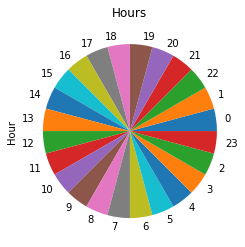

In [18]:
plt.title("Hours")
df['Hour'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Frequency'>

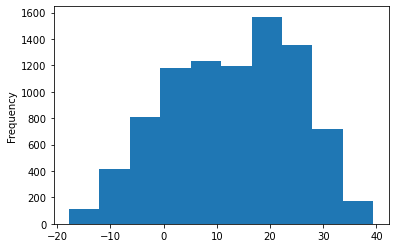

In [19]:
df['Temperature(°C)'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

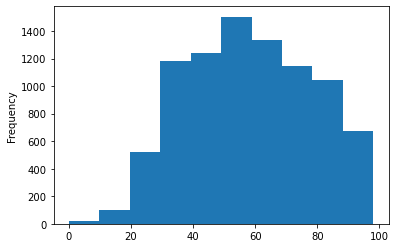

In [20]:
df['Humidity(%)'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

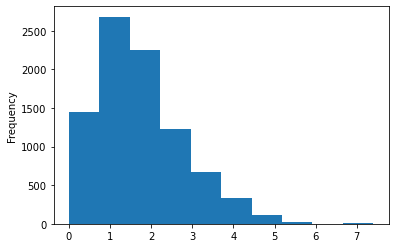

In [21]:
df['Wind speed (m/s)'].plot(kind='hist')

FILTER THE DATASET

In [22]:
X = new_df.drop(columns='Rented Bike Count')
y = np.sqrt(new_df['Rented Bike Count'])

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

ALGORITHM

In [24]:
reg=LinearRegression()

In [25]:
reg.fit(X_train,y_train)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LinearRegression()

In [26]:
y_pred=reg.predict(X_test)

C:\Users\prana\anaconda3\lib\site-packages\sklearn\utils\validation.py:572: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


EVALUATION METRICS

In [27]:
def score_metrics(actual,predicted):
    mae = mean_absolute_error(actual**2,predicted**2)
    print('mean absolute error is  :',mae)
    mse = mean_squared_error(actual**2,predicted**2)
    print('mean squared error is  :',mse)
    print('Root mean squared error is  :',np.sqrt(mse))
    print("R2 score is  :",r2_score(actual**2,predicted**2))

In [28]:
score_metrics(y_test,y_pred)

mean absolute error is  : 231.73529249656343
mean squared error is  : 118583.67227891761
Root mean squared error is  : 344.3598006140055
R2 score is  : 0.710206775767343


DATA VISUALIZATION

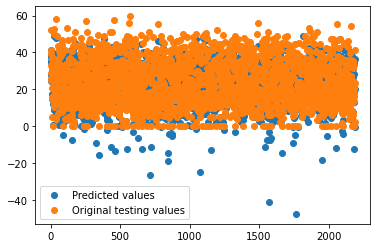

In [29]:
plt.scatter(range(0,len(y_pred)),y_pred)
#index of predict and predicted value(blue)
plt.scatter(range(0,len(y_test)),y_test)
#index of outcome and its value(orange)
plt.legend(["Predicted values","Original testing values"])
plt.show()

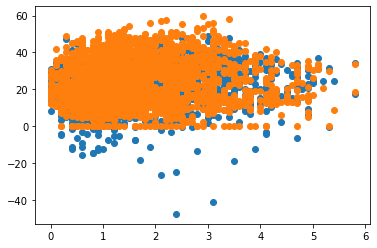

In [31]:
#highest negative value 2 in column
plt.scatter(X_test.iloc[:,2],y_pred)
#2(index)-Humidity and predicted value
plt.scatter(X_test.iloc[:,2],y_test)
# humidity and y value of data set
plt.show()

Conclusion:
    
    Hour , Temperature(�C) , Wind speed (m/s) , Dew point temperature(�C) , S0wfall(cm) , Seasons , Holiday , Functioning Day
    ( All these value increases automatically count of the rented bike Increases )
    
    Humidity(%) , Visibility (10m) , Solar Radiation (MJ/m2) , Rainfall(mm) 
    ( All these value increases automatically count of the rented bike Decreases )